In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data=pd.read_csv(city_data_to_load)

ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city","city"])

# Display the data table for preview

city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

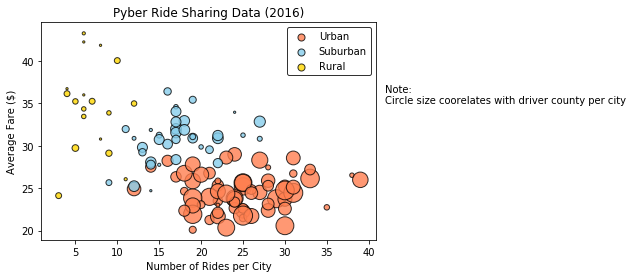

In [2]:
# Obtain the x and y coordinates for each of the three city types

urban_cities = city_ride_data[city_ride_data["type"]=="Urban"]
suburban_cities = city_ride_data[city_ride_data["type"]=="Suburban"]
rural_cities = city_ride_data[city_ride_data["type"]=="Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

urban_df = pd.DataFrame(urban_cities)
suburban_df = pd.DataFrame(suburban_cities)
rural_df = pd.DataFrame(rural_cities)


# Build the scatter plots for each city types

# Incorporate the other graph properties

plt.scatter(urban_ride_count,
           urban_avg_fare,
           edgecolor="black",
           c="coral",
           linewidths=1,
           marker="o",
           s=(urban_driver_count*5),
           alpha=0.8,
           label="Urban")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           edgecolor="black",
           c="skyblue",
           linewidths=1,
           marker="o",
           s=(suburban_driver_count*5),
           alpha=0.8,
           label="Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           edgecolor="black",
           c="gold",
           linewidths=1,
           marker="o",
           s=(rural_driver_count*5),
           alpha=0.8,
           label="Rural")


# Create a legend

plt.title('Pyber Ride Sharing Data (2016)')
plt.text(42,35, "Note:\nCircle size coorelates with driver county per city")
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare ($)')


# Incorporate a text label regarding circle size

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]


# Save Figure
#plt.savefig("Fig1.png")


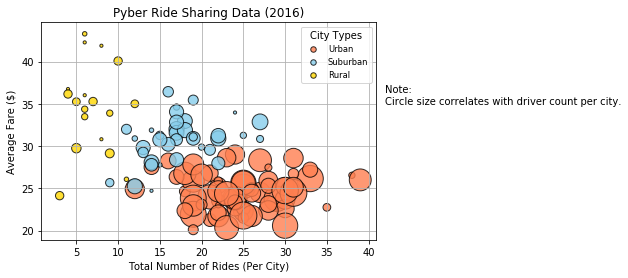

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

(-1.106722417471004,
 1.1858110280357825,
 -1.1120105036917267,
 1.1886612370560081)

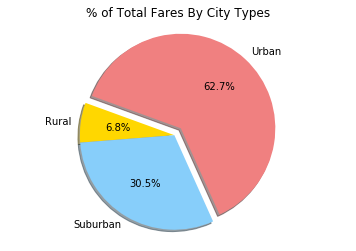

In [4]:
# Calculate Type Percents

by_type = city_ride_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

total_fare = by_type.sum()['fare']


# Build Pie Chart
labels = total_fare.index
#labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
#plt.savefig("Fig2.png")

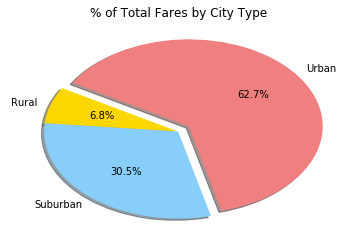

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

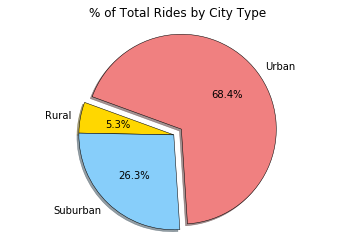

In [5]:
# Calculate Ride Percents

total_ride = by_type.count()['ride_id']

# Build Pie Chart

labels = total_ride.index
plt.pie(total_ride, startangle = 160, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()


# Save Figure
#plt.savefig("Fig3.png")

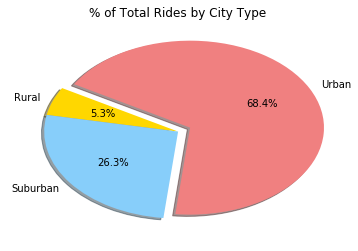

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

(-1.1048600678385447,
 1.2020614246094403,
 -1.0649518065384507,
 1.1472761767677582)

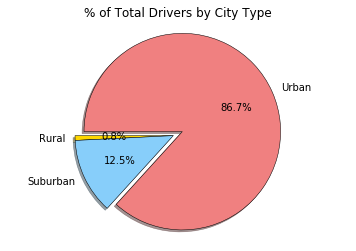

In [6]:
# Calculate Driver Percents

total_drivers = by_type.sum()['driver_count']

# Build Pie Charts


labels = total_drivers.index
plt.pie(total_drivers, startangle = 180, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')


# Save Figure
#plt.savefig("Fig4.png")

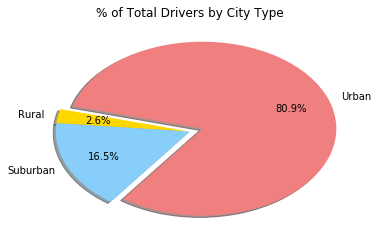

In [6]:
# Show Figure
plt.show()